#### We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.

### The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

Specifically:
X1	Relative Compactness 
X2	Surface Area
X3	Wall Area
X4	Roof Area
X5	Overall Height
X6	Orientation
X7	Glazing Area
X8	Glazing Area Distribution
y1	Heating Load
y2	Cooling Load

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
df=pd.read_excel("C:/Users/shiva/Desktop/ML Project/energy+efficiency/ENB2012_data.xlsx")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [76]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [77]:
df.dtypes

X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6      int64
X7    float64
X8      int64
Y1    float64
Y2    float64
dtype: object

In [78]:
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [79]:
df.duplicated().sum()

0

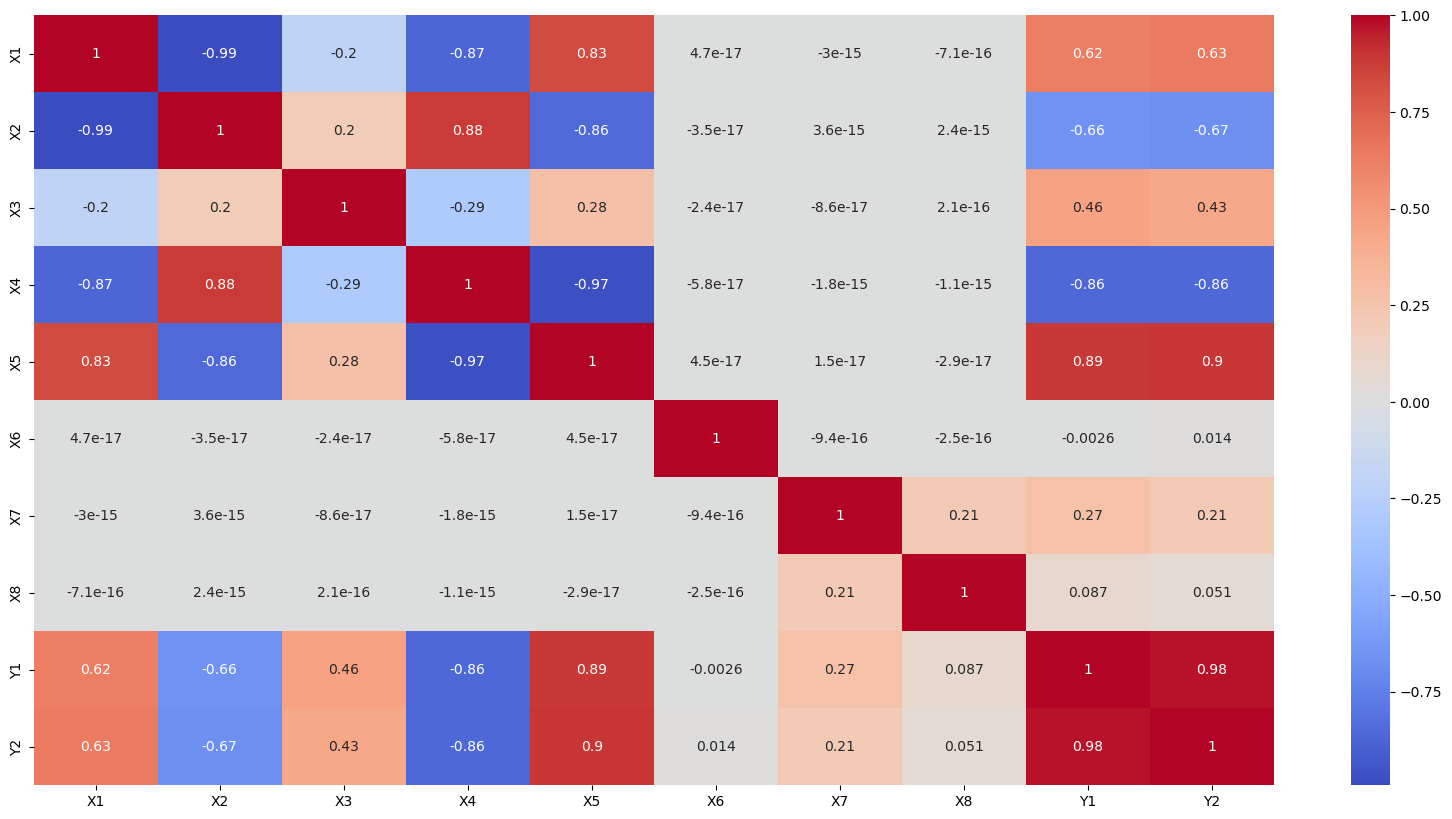

In [80]:
plt.figure(figsize=(20, 10))  # Set the figure size
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [82]:
X=df.iloc[:,:-2]
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


In [83]:
y2=df.iloc[:,-1]
y2.head()

0    21.33
1    21.33
2    21.33
3    21.33
4    28.28
Name: Y2, dtype: float64

In [84]:
y1=df.iloc[:,-2]
y1.head()

0    15.55
1    15.55
2    15.55
3    15.55
4    20.84
Name: Y1, dtype: float64

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X,y1,test_size=0.25,random_state=23)

In [86]:
st=StandardScaler()

In [87]:
X_train_scaled=st.fit_transform(X_train)

In [88]:
X_test_scaled=st.transform(X_test)

In [89]:
model_lin=LinearRegression()

In [90]:
model_lin_train = model_lin.fit(X_train_scaled,y_train)
model_lin_train

LinearRegression()

In [91]:
model_lin_predict = model_lin_train.predict(X_test_scaled)

In [92]:
r2 = r2_score(y_test,model_lin_predict)*100
r2

91.24642496835456

In [93]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor

In [94]:
def model_building(X_train,X_test,y_train,y_test):
    model_lin = LinearRegression()
    model_lasso = Lasso()
    model_ridge = Ridge()
    model_tree = DecisionTreeRegressor()

    print("Model Training Started")
    model_lin_train = model_lin.fit(X_train,y_train)
    model_lasso_train = model_lasso.fit(X_train,y_train)
    model_ridge_train = model_ridge.fit(X_train,y_train)
    model_tree_train = model_tree.fit(X_train,y_train)

    print("Model Predicted Started")
    model_lin_predict = model_lin_train.predict(X_test)
    model_lasso_predict = model_lasso_train.predict(X_test)
    model_ridge_predict = model_ridge_train.predict(X_test)
    model_tree_predict = model_tree_train.predict(X_test)

    print("r2 score")
    r2_lin = r2_score(y_test,model_lin_predict)*100
    print("The r2 score of LinearRegression is - ", round(r2_lin,2))
    r2_lasso = r2_score(y_test,model_lasso_predict)*100
    print("The r2 score of Lasso is - ", round(r2_lasso,2))
    r2_ridge = r2_score(y_test,model_ridge_predict)*100
    print("The r2 score of Ridge - ", round(r2_ridge,2))
    r2_tree = r2_score(y_test,model_tree_predict)*100
    print("The r2 score of DecisionTreeRegressor is - ", round(r2_tree,2))
    return r2_lin,r2_lasso,r2_ridge,r2_tree

In [95]:
r2_lin,r2_lasso,r2_ridge,r2_tree = model_building(X_train_scaled,X_test_scaled,y_train,y_test)

Model Training Started
Model Predicted Started
r2 score
The r2 score of LinearRegression is -  91.25
The r2 score of Lasso is -  88.97
The r2 score of Ridge -  91.25
The r2 score of DecisionTreeRegressor is -  99.67


In [96]:
import pickle

In [97]:
pickle.dump(st,open('standardscaler.pkl','wb'))

In [98]:
model_tree = DecisionTreeRegressor()

In [99]:
model_tree_train = model_tree.fit(X_train,y_train)

In [100]:
pickle.dump(model_tree,open('decisiontree1.pkl','wb'))

## For predicting Y2

In [101]:
X_train,X_test,y_train,y_test = train_test_split(X,y2,test_size=0.25,random_state=23)

In [102]:
model_lin=LinearRegression()

In [103]:
model_lin_train = model_lin.fit(X_train_scaled,y_train)
model_lin_train

LinearRegression()

In [104]:
model_lin_predict = model_lin_train.predict(X_test_scaled)

In [105]:
r2_y2 = r2_score(y_test,model_lin_predict)*100
r2_y2

87.25209545448254

In [106]:
def model_building(X_train,X_test,y_train,y_test):
    model_lin = LinearRegression()
    model_lasso = Lasso()
    model_ridge = Ridge()
    model_tree2 = DecisionTreeRegressor()

    print("Model Training Started")
    model_lin_train = model_lin.fit(X_train,y_train)
    model_lasso_train = model_lasso.fit(X_train,y_train)
    model_ridge_train = model_ridge.fit(X_train,y_train)
    model_tree_train2 = model_tree2.fit(X_train,y_train)

    print("Model Predicted Started")
    model_lin_predict = model_lin_train.predict(X_test)
    model_lasso_predict = model_lasso_train.predict(X_test)
    model_ridge_predict = model_ridge_train.predict(X_test)
    model_tree_predict = model_tree_train2.predict(X_test)

    print("r2 score")
    r2_lin = r2_score(y_test,model_lin_predict)*100
    print("The r2 score of LinearRegression is - ", round(r2_lin,2))
    r2_lasso = r2_score(y_test,model_lasso_predict)*100
    print("The r2 score of Lasso is - ", round(r2_lasso,2))
    r2_ridge = r2_score(y_test,model_ridge_predict)*100
    print("The r2 score of Ridge - ", round(r2_ridge,2))
    r2_tree = r2_score(y_test,model_tree_predict)*100
    print("The r2 score of DecisionTreeRegressor is - ", round(r2_tree,2))
    return r2_lin,r2_lasso,r2_ridge,r2_tree

In [107]:
r2_lin,r2_lasso,r2_ridge,r2_tree = model_building(X_train_scaled,X_test_scaled,y_train,y_test)

Model Training Started
Model Predicted Started
r2 score
The r2 score of LinearRegression is -  87.25
The r2 score of Lasso is -  84.33
The r2 score of Ridge -  87.21
The r2 score of DecisionTreeRegressor is -  94.83


In [108]:
model_tree2 = DecisionTreeRegressor()

In [109]:
model_tree_train2 = model_tree2.fit(X_train,y_train)

In [110]:
pickle.dump(model_tree,open('decisiontree2.pkl','wb'))